# Анализ поведенческих метрик в кластеризации транзакций

В этом ноутбуке мы проанализируем поведенческие метрики, используемые в модели кластеризации.

In [18]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка отображения графиков
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
%matplotlib inline

## 1. Загрузка данных

Загрузим данные из parquet файла, который содержит результаты кластеризации

In [19]:
# Загружаем данные
df = pd.read_parquet('clustered_transactions.parquet')
print(f"Размер датасета: {df.shape}")
df.head()

Размер датасета: (11536850, 18)


,transaction_id,transaction_timestamp,card_id,expiry_date,issuer_bank_name,merchant_id,merchant_mcc,mcc_category,merchant_city,transaction_type,transaction_amount_kzt,original_amount,transaction_currency,acquirer_country_iso,pos_entry_mode,wallet_type,cluster,cluster_name
0,ffb21bbd-fef1-4983-9774-3b01c8fc2537,2023-08-12 23:14:19.043176,10000,09/26,My Favorite Bank,50359.0,5499.0,Grocery & Food Markets,Shymkent,POS,1237.66,NaN,KZT,KAZ,Contactless,Apple Pay,0,Сегмент Крупных Розничных Покупателей
1,acd754f9-bd4c-416d-babc-926050ffe8c4,2023-08-12 17:07:08.641030,10000,09/26,My Favorite Bank,50359.0,5499.0,Grocery & Food Markets,Shymkent,POS,2328.03,NaN,KZT,KAZ,QR_Code,Bank's QR,0,Сегмент Крупных Розничных Покупателей
2,b023697b-eb35-40e6-af75-3586c60acbfb,2023-08-12 08:45:32.946846,10000,09/26,My Favorite Bank,50214.0,4814.0,Utilities & Bill Payments,Almaty,BILL_PAYMENT,53871.78,NaN,KZT,KAZ,None,None,0,Сегмент Крупных Розничных Покупателей
3,d59d8537-1e48-41b5-91e1-dc7cf9d0c776,2023-08-12 10:20:20.242510,10000,09/26,My Favorite Bank,50279.0,8011.0,Pharmacies & Health,Shymkent,POS,22501.56,NaN,KZT,KAZ,Contactless,Apple Pay,0,Сегмент Крупных Розничных Покупателей
4,85d2eef6-3b09-47a6-987f-f45ab491282f,2023-08-12 00:42:00.556252,10000,09/26,My Favorite Bank,50332.0,5499.0,Grocery & Food Markets,Almaty,POS,1224.04,NaN,KZT,KAZ,QR_Code,Bank's QR,0,Сегмент Крупных Розничных Покупателей


## 2. Анализ финансовых метрик

Проанализируем основные финансовые показатели по кластерам

In [21]:
# Группируем данные по кластерам
financial_metrics = df.groupby('cluster').agg({
    'transaction_amount_kzt': ['mean', 'median', 'std', 'count']
}).round(2)

financial_metrics.columns = ['Средняя сумма', 'Медианная сумма', 'Стандартное отклонение', 'Количество транзакций']
financial_metrics

,Средняя сумма,Медианная сумма,Стандартное отклонение,Количество транзакций
cluster,,,,
-1,19148.22,4477.77,48694.40,1307
0,27459.79,9026.88,105518.25,2885673
1,28097.37,8447.22,116885.03,2678086
2,15019.37,5748.17,38021.90,2212659
3,11943.47,3585.03,31416.83,3756991
4,31090.00,12012.00,56050.97,262
5,26763.00,16515.63,38167.03,93
6,31116.16,9132.66,58522.29,68
7,16608.02,4267.21,35145.17,130


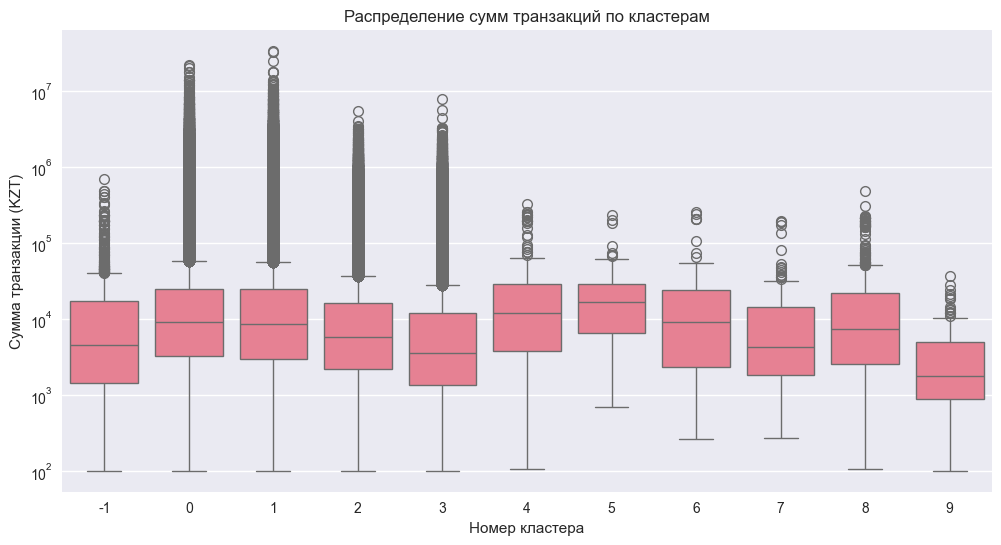

In [23]:
# Визуализация распределения сумм транзакций по кластерам
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='transaction_amount_kzt', data=df)
plt.title('Распределение сумм транзакций по кластерам')
plt.xlabel('Номер кластера')
plt.ylabel('Сумма транзакции (KZT)')
plt.yscale('log')
plt.show()

## 3. Анализ частотных метрик

Изучим частоту транзакций в каждом кластере

In [24]:
# Считаем количество транзакций на карту
transactions_per_card = df.groupby(['cluster', 'card_id']).size().reset_index(name='transaction_count')

# Анализируем статистику по кластерам
frequency_stats = transactions_per_card.groupby('cluster')['transaction_count'].agg(['mean', 'median', 'std']).round(2)
frequency_stats.columns = ['Среднее количество', 'Медианное количество', 'Стандартное отклонение']
frequency_stats

,Среднее количество,Медианное количество,Стандартное отклонение
cluster,,,
-1,118.82,24.0,165.02
0,6870.65,5591.5,4948.91
1,4731.60,3088.5,5213.28
2,7450.03,6272.0,5901.51
3,5557.68,2580.0,7324.40
4,37.43,37.0,7.28
5,31.00,27.0,11.53
6,22.67,22.0,14.01
7,43.33,48.0,9.87


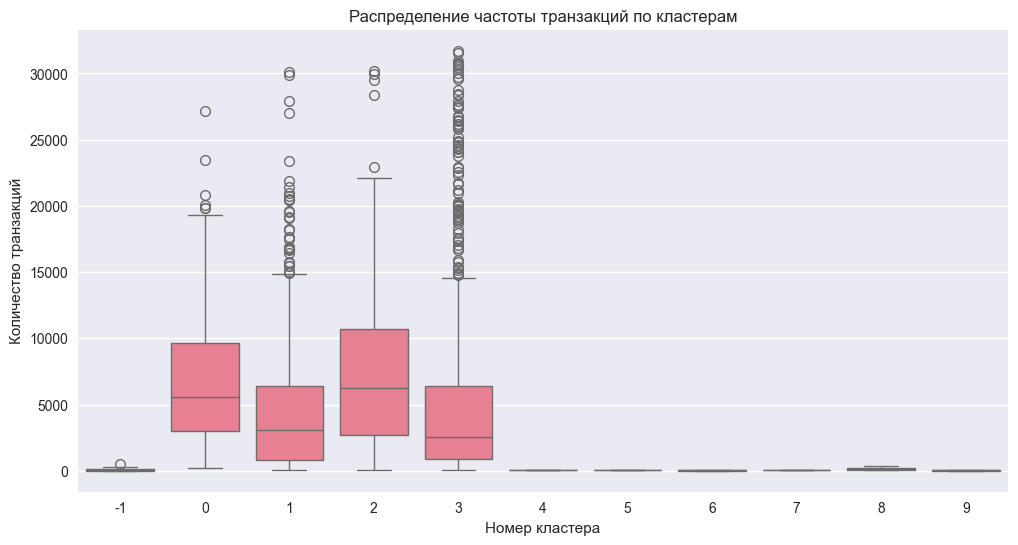

In [26]:
# Визуализация распределения частоты транзакций
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='transaction_count', data=transactions_per_card)
plt.title('Распределение частоты транзакций по кластерам')
plt.xlabel('Номер кластера')
plt.ylabel('Количество транзакций')
plt.show()

## 4. Анализ географических метрик

Исследуем географическое распределение транзакций

In [27]:
# Анализ международных транзакций
international_tx = df.groupby('cluster').agg({
    'transaction_currency': lambda x: (x != 'KZT').mean()
}).round(3)

international_tx.columns = ['Доля международных транзакций']
international_tx

,Доля международных транзакций
cluster,
-1,0.000
0,0.001
1,0.000
2,0.001
3,0.000
4,0.000
5,0.000
6,0.000
7,0.000


<Figure size 1000x600 with 0 Axes>

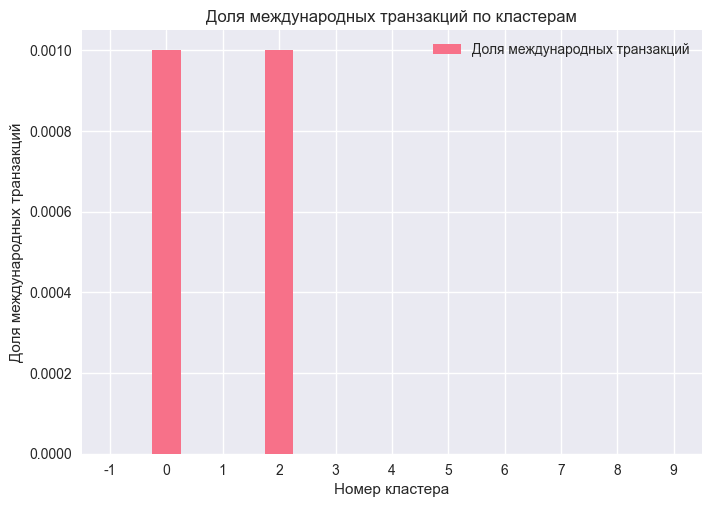

In [28]:
# Визуализация доли международных транзакций
plt.figure(figsize=(10, 6))
international_tx.plot(kind='bar')
plt.title('Доля международных транзакций по кластерам')
plt.xlabel('Номер кластера')
plt.ylabel('Доля международных транзакций')
plt.xticks(rotation=0)
plt.show()

## 5. Анализ временных метрик

Изучим временные паттерны транзакций

In [29]:
# Добавляем временные метрики
df['hour'] = pd.to_datetime(df['transaction_timestamp']).dt.hour
df['is_weekend'] = pd.to_datetime(df['transaction_timestamp']).dt.dayofweek >= 5

# Анализируем временные паттерны
time_patterns = df.groupby('cluster').agg({
    'hour': ['mean', 'std'],
    'is_weekend': 'mean'
}).round(3)

time_patterns.columns = ['Средний час', 'Стандартное отклонение часа', 'Доля выходных']
time_patterns

,Средний час,Стандартное отклонение часа,Доля выходных
cluster,,,
-1,13.480,5.651,0.402
0,13.533,5.404,0.388
1,13.526,5.402,0.389
2,13.534,5.405,0.388
3,13.533,5.407,0.388
4,13.053,4.970,0.305
5,12.925,5.159,0.462
6,12.500,5.971,0.412
7,13.585,5.449,0.338


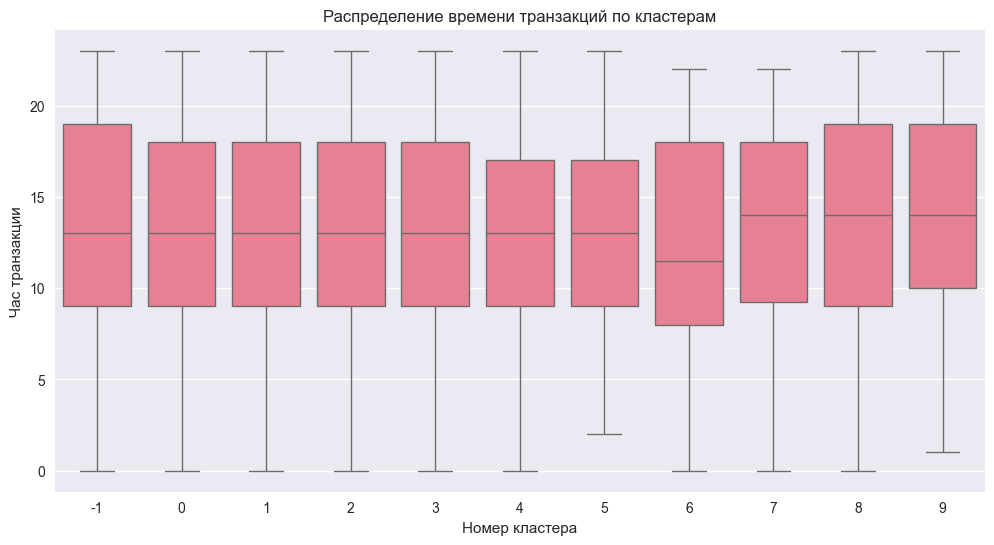

In [30]:
# Визуализация распределения времени транзакций
plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='hour', data=df)
plt.title('Распределение времени транзакций по кластерам')
plt.xlabel('Номер кластера')
plt.ylabel('Час транзакции')
plt.show()

## 6. Анализ категориальных метрик

Исследуем распределение по категориям MCC

In [31]:
# Анализ топ категорий по кластерам
top_categories = df.groupby(['cluster', 'mcc_category']).size().reset_index(name='count')
top_categories = top_categories.sort_values(['cluster', 'count'], ascending=[True, False])

# Выводим топ-5 категорий для каждого кластера
for cluster in df['cluster'].unique():
    print(f"\nТоп-5 категорий для кластера {cluster}:")
    print(top_categories[top_categories['cluster'] == cluster].head())


Топ-5 категорий для кластера 0:
    cluster               mcc_category   count
24        0                    Unknown  756620
18        0     Grocery & Food Markets  471270
25        0  Utilities & Bill Payments  399209
14        0       Dining & Restaurants  244208
22        0           Services (Other)  222778

Топ-5 категорий для кластера 1:
    cluster               mcc_category   count
38        1  Utilities & Bill Payments  660114
37        1                    Unknown  455177
31        1     Grocery & Food Markets  404421
35        1           Services (Other)  219179
27        1       Dining & Restaurants  217423

Топ-5 категорий для кластера 2:
    cluster               mcc_category   count
50        2                    Unknown  598379
44        2     Grocery & Food Markets  387795
51        2  Utilities & Bill Payments  286082
40        2       Dining & Restaurants  220675
48        2           Services (Other)  145361

Топ-5 категорий для кластера 3:
    cluster           

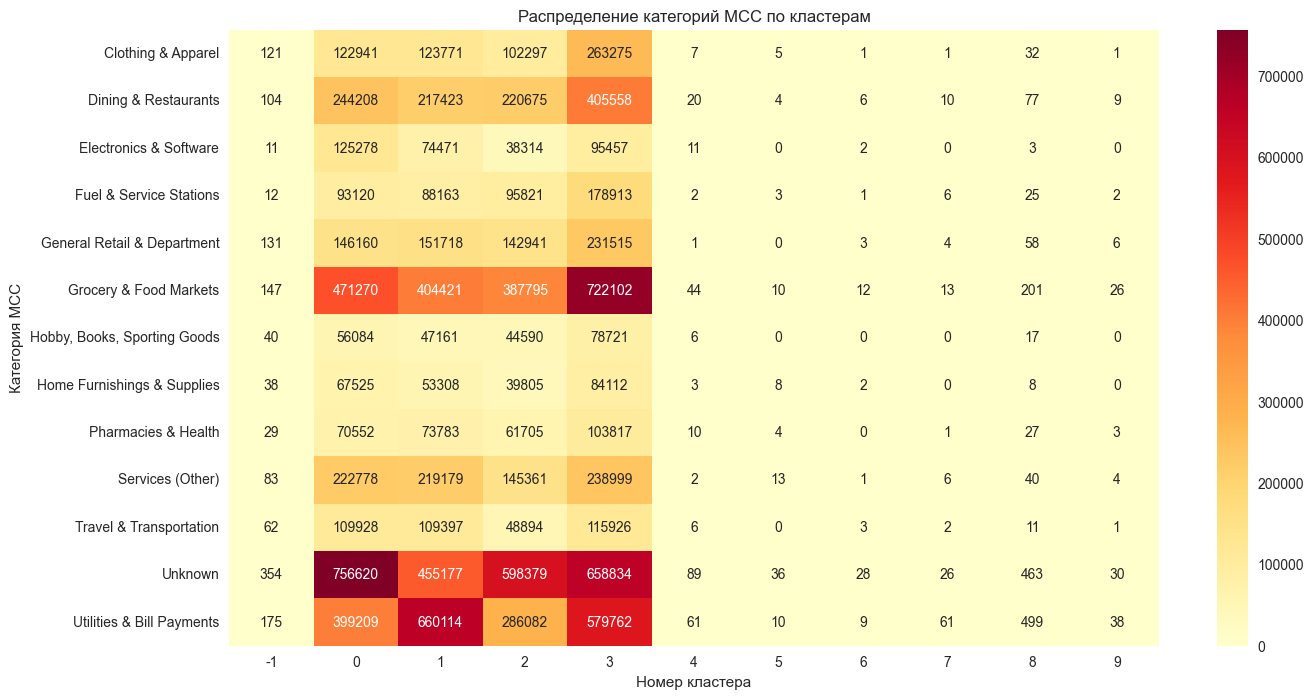

In [32]:
# Визуализация распределения категорий
plt.figure(figsize=(15, 8))
category_pivot = pd.pivot_table(
    top_categories,
    values='count',
    index='mcc_category',
    columns='cluster',
    fill_value=0
)

sns.heatmap(category_pivot, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Распределение категорий MCC по кластерам')
plt.xlabel('Номер кластера')
plt.ylabel('Категория MCC')
plt.xticks(rotation=0)
plt.show()

## 7. Сводный анализ кластеров

Создадим сводную таблицу с основными характеристиками каждого кластера

In [33]:
# Создаем сводную таблицу
cluster_summary = df.groupby('cluster').agg({
    'transaction_amount_kzt': ['mean', 'median', 'std'],
    'card_id': 'nunique',
    'transaction_currency': lambda x: (x != 'KZT').mean(),
    'hour': ['mean', 'std'],
    'is_weekend': 'mean',
    'mcc_category': 'nunique'
}).round(3)

cluster_summary.columns = [
    'Средняя сумма', 'Медианная сумма', 'Стандартное отклонение суммы',
    'Количество карт', 'Доля международных транзакций',
    'Средний час', 'Стандартное отклонение часа',
    'Доля выходных', 'Количество уникальных категорий'
]

cluster_summary

,Средняя сумма,Медианная сумма,Стандартное отклонение суммы,Количество карт,Доля международных транзакций,Средний час,Стандартное отклонение часа,Доля выходных,Количество уникальных категорий
cluster,,,,,,,,,
-1,19148.223,4477.770,48694.401,11,0.000,13.480,5.651,0.402,13
0,27459.788,9026.880,105518.246,420,0.001,13.533,5.404,0.388,13
1,28097.369,8447.225,116885.030,566,0.000,13.526,5.402,0.389,13
2,15019.368,5748.170,38021.898,297,0.001,13.534,5.405,0.388,13
3,11943.475,3585.030,31416.828,676,0.000,13.533,5.407,0.388,13
4,31090.004,12012.000,56050.971,7,0.000,13.053,4.970,0.305,13
5,26762.997,16515.630,38167.031,3,0.000,12.925,5.159,0.462,9
6,31116.157,9132.660,58522.294,3,0.000,12.500,5.971,0.412,11
7,16608.025,4267.210,35145.168,3,0.000,13.585,5.449,0.338,10


## 8. Сохранение результатов

Сохраним результаты анализа в CSV файл

In [34]:
# Сохраняем сводную таблицу
cluster_summary.to_csv('cluster_analysis_results.csv')
print("Результаты анализа сохранены в файл 'cluster_analysis_results.csv'")

Результаты анализа сохранены в файл 'cluster_analysis_results.csv'
